In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [4]:
!wget -O data.csv "https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"

--2020-09-20 18:41:42--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 54.204.141.17, 34.224.12.157, 3.221.234.207, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|54.204.141.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data.csv’

    [      <=>                              ] 84,970,414  70.1MB/s   in 1.2s   

2020-09-20 18:41:44 (70.1 MB/s) - ‘data.csv’ saved [84970414]



In [5]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 40 columns):
X                  214050 non-null float64
Y                  214050 non-null float64
OBJECTID           221525 non-null int64
INCKEY             221525 non-null int64
COLDETKEY          221525 non-null int64
REPORTNO           221525 non-null object
STATUS             221525 non-null object
ADDRTYPE           217813 non-null object
INTKEY             71936 non-null float64
LOCATION           216935 non-null object
EXCEPTRSNCODE      101122 non-null object
EXCEPTRSNDESC      11779 non-null object
SEVERITYCODE       221524 non-null object
SEVERITYDESC       221525 non-null object
COLLISIONTYPE      195212 non-null object
PERSONCOUNT        221525 non-null int64
PEDCOUNT           221525 non-null int64
PEDCYLCOUNT        221525 non-null int64
VEHCOUNT           221525 non-null int64
INJURIES           221525 non-null int64
SERIOUSINJURIES    221525 non-null int64
FATALITIES     

In [6]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = data[['Y', 'X']][data['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [7]:
data['WEATHER'].value_counts().to_frame('count')

,count
Clear,114738
Raining,34036
Overcast,28552
Unknown,15131
Snowing,919
Other,860
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


In [8]:
data['ROADCOND'].value_counts().to_frame('count')

,count
Dry,128588
Wet,48734
Unknown,15139
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


In [9]:
data['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,119492
Dark - Street Lights On,50133
Unknown,13532
Dusk,6082
Dawn,2609
Dark - No Street Lights,1579
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,23


In [10]:
data['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9929


In [11]:
data['SEVERITYCODE'].value_counts().to_frame('count')

,count
1,137671
2,58783
0,21615
2b,3105
3,350


In [12]:
data['UNDERINFL'].value_counts().to_frame('count')

,count
N,103927
0,81676
Y,5399
1,4230


In [13]:
data['PERSONCOUNT'].describe()

count    221525.000000
mean          2.226941
std           1.470050
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

In [14]:
data['VEHCOUNT'].describe()

count    221525.000000
mean          1.730482
std           0.829754
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: VEHCOUNT, dtype: float64

In [15]:
data['PEDCOUNT'].describe()

count    221525.000000
mean          0.038118
std           0.201766
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [16]:
data['PEDCYLCOUNT'].describe()

count    221525.000000
mean          0.027360
std           0.164537
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [17]:
data.isna().sum()

X                    7475
Y                    7475
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149589
LOCATION             4590
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209746
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26313
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11974
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191337
UNDERINFL           26293
WEATHER             26503
ROADCOND            26422
LIGHTCOND           26592
PEDROWNOTGRNT      216330
SDOTCOLNUM          94320
SPEEDING           211596
ST_COLCODE           9413
ST_COLDESC          26313
SEGLANEKEY              0
CROSSWALKKEY

In [18]:
data.duplicated().sum()

0

In [19]:
data_clean = data[['X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'UNDERINFL',
                   'SERIOUSINJURIES', 'FATALITIES', 'INJURIES',
                   'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 15 columns):
X                  214050 non-null float64
Y                  214050 non-null float64
WEATHER            195022 non-null object
ROADCOND           195103 non-null object
LIGHTCOND          194933 non-null object
SPEEDING           9929 non-null object
SEVERITYCODE       221524 non-null object
UNDERINFL          195232 non-null object
SERIOUSINJURIES    221525 non-null int64
FATALITIES         221525 non-null int64
INJURIES           221525 non-null int64
PERSONCOUNT        221525 non-null int64
PEDCOUNT           221525 non-null int64
PEDCYLCOUNT        221525 non-null int64
VEHCOUNT           221525 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 25.4+ MB


In [20]:
data_clean['SPEEDING'] = data_clean['SPEEDING'].map({'Y': 1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
data_clean['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,211596
1.0,9929


In [21]:
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

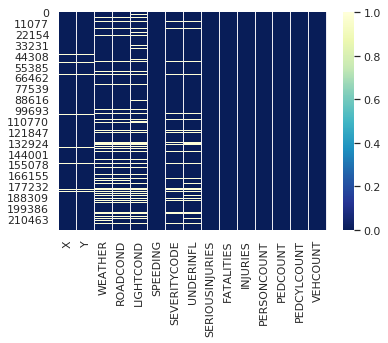

In [22]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [23]:
data_clean.dropna(axis=0, inplace=True)

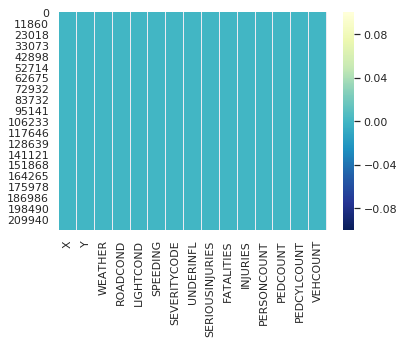

In [24]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [25]:
data_clean['UNDERINFL'] = data_clean['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171432 entries, 0 to 221523
Data columns (total 15 columns):
X                  171432 non-null float64
Y                  171432 non-null float64
WEATHER            171432 non-null object
ROADCOND           171432 non-null object
LIGHTCOND          171432 non-null object
SPEEDING           171432 non-null float64
SEVERITYCODE       171432 non-null object
UNDERINFL          171432 non-null int64
SERIOUSINJURIES    171432 non-null int64
FATALITIES         171432 non-null int64
INJURIES           171432 non-null int64
PERSONCOUNT        171432 non-null int64
PEDCOUNT           171432 non-null int64
PEDCYLCOUNT        171432 non-null int64
VEHCOUNT           171432 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 20.9+ MB


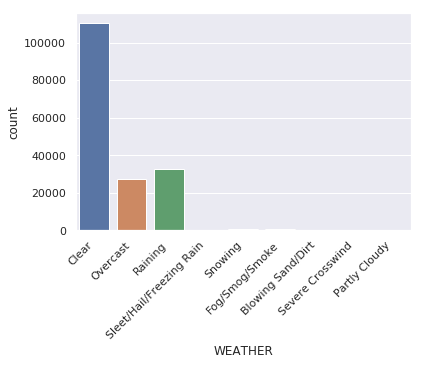

In [27]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

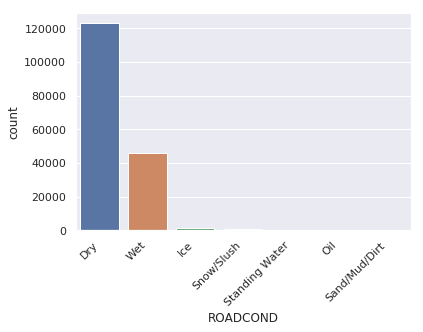

In [28]:
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

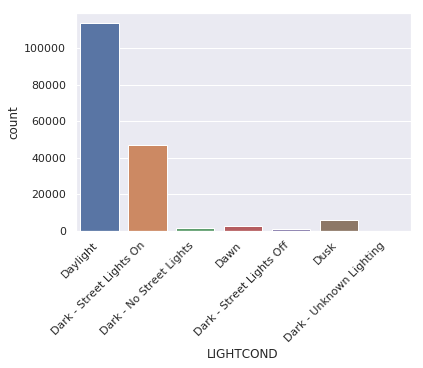

In [29]:
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

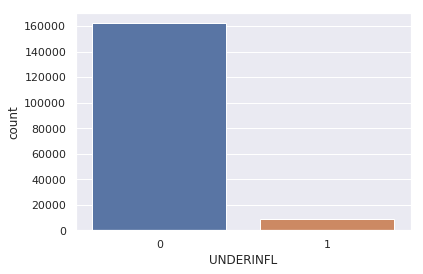

In [30]:

sns.countplot(data_clean['UNDERINFL'])

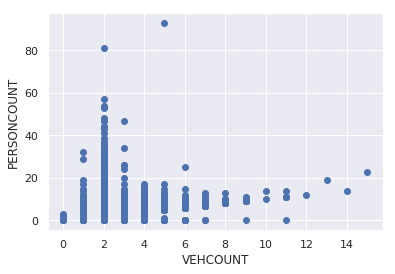

In [31]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

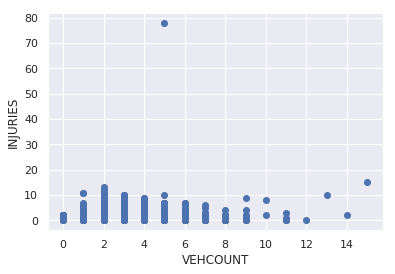

In [32]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['INJURIES'])
plt.xlabel('VEHCOUNT')
plt.ylabel('INJURIES')
plt.show()

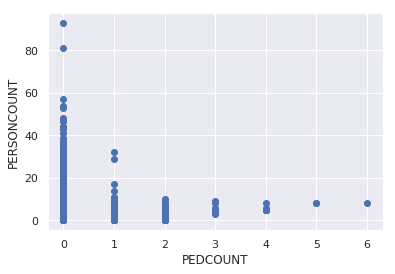

In [33]:
ax = plt.scatter(data_clean['PEDCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('PEDCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

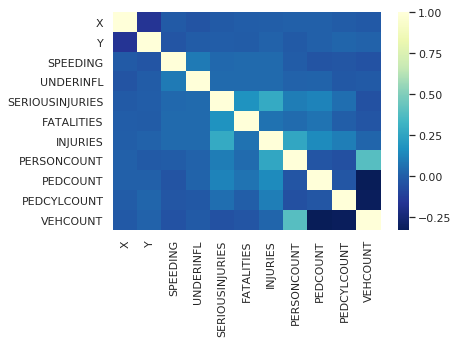

In [34]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [35]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

In [36]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [37]:
data_clean.head(5).T

,0,1,2,3,4
X,-122.337,-122.308,-122.271,-122.309,-122.334
Y,47.648,47.6649,47.5577,47.6185,47.5519
SPEEDING,0,0,1,0,0
SEVERITYCODE,1,1,2,1,2
UNDERINFL,0,0,0,0,0
SERIOUSINJURIES,0,0,0,0,0
FATALITIES,0,0,0,0,0
INJURIES,0,0,1,0,1
PERSONCOUNT,2,2,2,1,2
PEDCOUNT,0,0,0,0,0


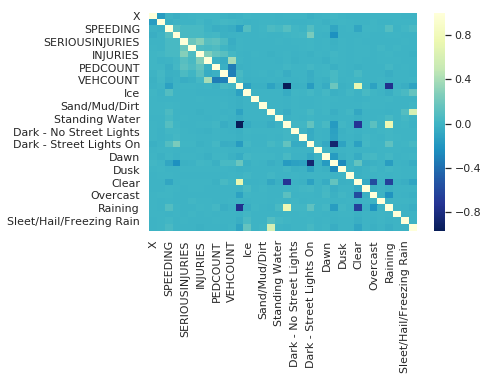

In [38]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [39]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

array([[-0.2201491 ,  0.51368444, -0.2362431 , -0.23853268, -0.10637785,
        -0.04124352, -0.57976709, -0.35954689, -0.21020403, -0.18563301,
         0.05712785, -1.59645092, -0.07951158, -0.01690885, -0.01839677,
        -0.06975045, -0.02391615,  1.64647816, -0.08991954, -0.08072836,
        -0.61631604, -0.00995864, -0.12013555,  0.71354813, -0.18552046,
        -0.01565424, -1.34243733, -0.05647337,  2.3031503 , -0.00763777,
        -0.48302678, -0.01207691, -0.0252235 , -0.06953902],
       [ 0.73894129,  0.80991169, -0.2362431 , -0.23853268, -0.10637785,
        -0.04124352, -0.57976709, -0.35954689, -0.21020403, -0.18563301,
         0.05712785,  0.62638944, -0.07951158, -0.01690885, -0.01839677,
        -0.06975045, -0.02391615, -0.60735698, -0.08991954, -0.08072836,
         1.62254418, -0.00995864, -0.12013555, -1.40144716, -0.18552046,
        -0.01565424,  0.74491373, -0.05647337, -0.4341879 , -0.00763777,
        -0.48302678, -0.01207691, -0.0252235 , -0.06953902],
  

In [40]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
yHat = dTreeModel.predict(x_test)

In [43]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22581
           2       1.00      1.00      1.00     11074
          2b       1.00      1.00      1.00       572
           3       1.00      1.00      1.00        60

   micro avg       1.00      1.00      1.00     34287
   macro avg       1.00      1.00      1.00     34287
weighted avg       1.00      1.00      1.00     34287



In [44]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
yHat = rfcModel.predict(x_test)

In [46]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22581
           2       1.00      1.00      1.00     11074
          2b       1.00      1.00      1.00       572
           3       1.00      1.00      1.00        60

   micro avg       1.00      1.00      1.00     34287
   macro avg       1.00      1.00      1.00     34287
weighted avg       1.00      1.00      1.00     34287



In [47]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(x_train, y_train)
logRegModel

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
yHat = logRegModel.predict(x_test)

In [49]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22581
           2       1.00      1.00      1.00     11074
          2b       1.00      0.97      0.98       572
           3       1.00      0.97      0.98        60

   micro avg       1.00      1.00      1.00     34287
   macro avg       1.00      0.98      0.99     34287
weighted avg       1.00      1.00      1.00     34287



In [50]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, input_dim=x_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
num_epochs = 10
history = model.fit(x_train, tf.keras.utils.to_categorical(
    y_train['SEVERITYCODE'].map({
        '1': 0,
        '2': 1,
        '2b': 2,
        '3': 3
    }), dtype='float32'
), epochs=num_epochs, batch_size=50, validation_split = 0.2)

Train on 109716 samples, validate on 27429 samples
Epoch 1/10
109716/109716 [==============================] - 73s 661us/sample - loss: nan - acc: 0.6570 - val_loss: nan - val_acc: 0.6602
Epoch 2/10
109716/109716 [==============================] - 82s 745us/sample - loss: nan - acc: 0.6570 - val_loss: nan - val_acc: 0.6602
Epoch 3/10
109716/109716 [==============================] - 63s 576us/sample - loss: nan - acc: 0.6570 - val_loss: nan - val_acc: 0.6602
Epoch 4/10
109716/109716 [==============================] - 58s 527us/sample - loss: nan - acc: 0.6570 - val_loss: nan - val_acc: 0.6602
Epoch 5/10
109716/109716 [==============================] - 48s 438us/sample - loss: nan - acc: 0.6570 - val_loss: nan - val_acc: 0.6602
Epoch 6/10
109716/109716 [==============================] - 51s 462us/sample - loss: nan - acc: 0.6570 - val_loss: nan - val_acc: 0.6602
Epoch 7/10
109716/109716 [==============================] - 48s 438us/sample - loss: nan - acc: 0.6570 - val_loss: nan - val_ac

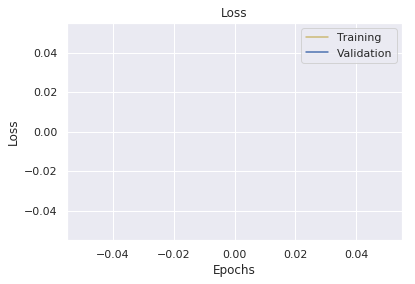

In [69]:
loss_train = history.history['loss']
loss_validation = history.history['val_loss']
epochs = range(1, num_epochs + 1)
plt.plot(epochs, loss_train, 'y', label='Training')
plt.plot(epochs, loss_validation, 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_validation = history.history['val_accuracy']
epochs = range(1, num_epochs + 1)
plt.plot(epochs, acc_train, 'y', label='Training')
plt.plot(epochs, acc_validation, 'b', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [54]:
yHat = model.predict(x_test)
yPred = [np.argmax(y) for y in yHat]

In [55]:
print(classification_report(y_test.SEVERITYCODE.map({
        '1': 0,
        '2': 1,
        '2b': 2,
        '3': 3
}), yPred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     22581
           1       0.00      0.00      0.00     11074
           2       0.00      0.00      0.00       572
           3       0.00      0.00      0.00        60

   micro avg       0.66      0.66      0.66     34287
   macro avg       0.16      0.25      0.20     34287
weighted avg       0.43      0.66      0.52     34287



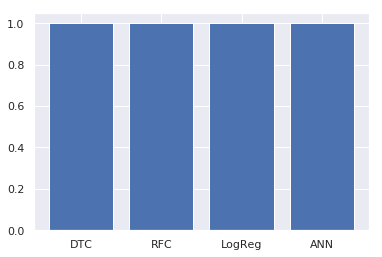

In [56]:
plt.bar(['DTC', 'RFC', 'LogReg', 'ANN'], [1.,1.,1.,1.])
plt.show()